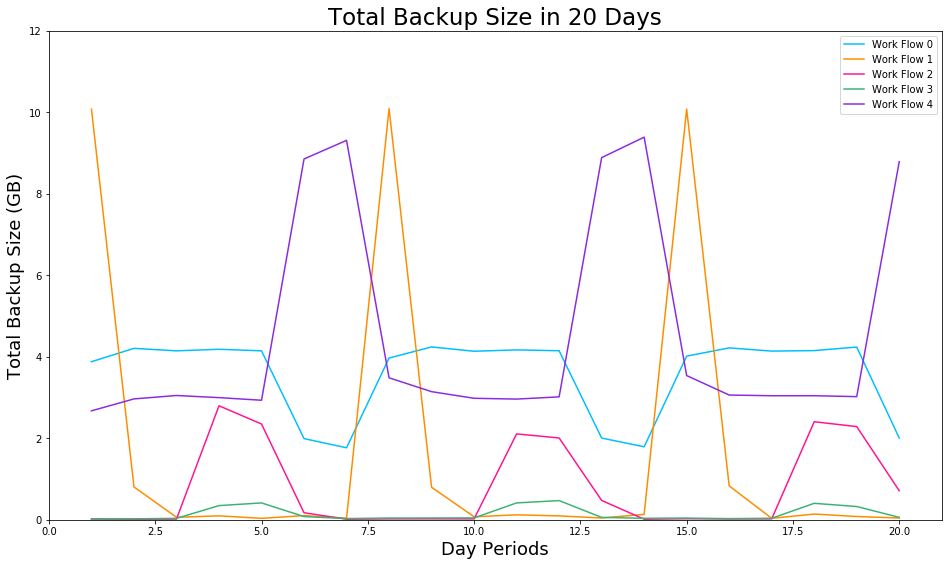

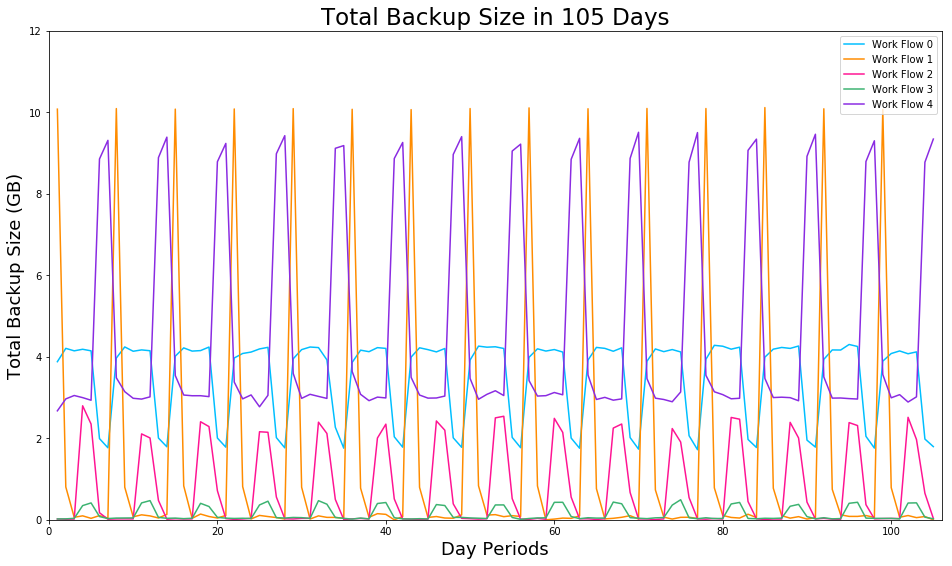

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# load data from file
data = pd.read_csv('network_backup_dataset.csv')
data.columns = ['week', 'day_of_week_orig', 'start_time','work_flow_orig','file_name_orig','size','duration']

def replace_str_with_int(data, column, insert_pos, truncate_pos=0, map_day=None):
    new_col = []
    for item in data[column]:
        if map_day:
            new_col.append(map_day[item])
        else:
            new_col.append(int(item[truncate_pos:]))
    
    data.insert(insert_pos, column[:len(column) - 5], new_col)
    data.drop(column, 1, inplace = True)       

# 1 encode day of week
map_day = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
replace_str_with_int(data, 'day_of_week_orig', 2, 0, map_day)

# 2 encode work flow
replace_str_with_int(data, 'work_flow_orig', 3, 10)

# 3 encode file name
replace_str_with_int(data, 'file_name_orig', 4, 5)

# save the plot data
def get_sizes(days, data):
    week = int(days / 7) + 1
    remain = days % 7
    df = data[(data['week'] < week) | ((data['week'] == week) & (data['day_of_week'] <= remain))]
    df = df.groupby(['work_flow', 'week', 'day_of_week']).agg({'size': np.sum})

    all_sizes = {}
    for i in range(5):
        all_sizes[i] = df.loc[i]['size'].values
    return all_sizes

sizes20 = get_sizes(20, data)
sizes105 = get_sizes(105, data)

# plot figures
def plot_size_vs_days(period, total_size):
    plt.figure(figsize = (16,9))
    colors = ['deepskyblue', 'darkorange', 'deeppink', 'mediumseagreen', 'blueviolet']
    for i in range(5):
        plt.plot(range(1, period+1), total_size[i], colors[i], label='Work Flow '+str(i))
    plt.ylabel('Total Backup Size (GB)', fontsize = 18)
    plt.xlabel('Day Periods', fontsize = 18)
    plt.title('Total Backup Size in '+str(period)+' Days', fontsize = 23)
    plt.axis([0,period+1,0,12])
    plt.legend(loc = 'upper right')
    plt.show()

# 20 periods
plot_size_vs_days(20, sizes20)
# 105 periods
plot_size_vs_days(105, sizes105)


